In [22]:
import pandas as pd 
import numpy as np 
import yaml
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification

In [26]:
X, y = make_classification(n_samples=100, n_features=4,
                          n_informative=2, n_redundant=2,
                          random_state=0, shuffle=False)
clf = BaggingClassifier(estimator=SVC(), n_estimators=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y)

array([[ 4.22341441e-01, -2.05321581e+00, -2.03911440e+00,
        -8.49123046e-01],
       [-1.25732069e+00, -3.19826339e+00, -2.14861012e+00,
        -3.04373307e+00],
       [ 1.23195055e+00, -9.95105317e-01, -1.53949526e+00,
         5.11600970e-01],
       [-4.37843295e-02, -1.27395967e+00, -1.10110026e+00,
        -8.01690305e-01],
       [-1.30819171e+00, -1.28532883e+00, -4.32659559e-01,
        -1.94473774e+00],
       [-1.62073375e+00, -2.22244349e+00, -1.09219355e+00,
        -2.78637404e+00],
       [-3.59967304e-01, -1.41363563e+00, -1.05473721e+00,
        -1.16940705e+00],
       [-7.62884416e-01, -1.45125944e+00, -8.71745826e-01,
        -1.55399781e+00],
       [ 4.86681188e-01, -1.45709006e+00, -1.54740567e+00,
        -4.34580195e-01],
       [-2.68051210e-01, -4.47369310e-01, -2.51082272e-01,
        -5.08589018e-01],
       [-3.69743600e+00, -4.61220130e-01,  1.57688756e+00,
        -3.59865169e+00],
       [ 1.83324682e-01, -7.66054695e-01, -7.74610354e-01,
      

# Cancer dataset

In [21]:
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["cancer"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
NAN = df.isna().sum().sum()
row = df.shape[0]
col = df.shape[1]
print(f'the amount of rows:{row}, the amount of columns:{col}')
print(f'amount of NAN values:{NAN}')

the amount of rows:569, the amount of columns:32
amount of NAN values:0


In [ ]:
# filter the two diagnosis for plotting later
B_df_col = df.loc[df["diagnosis"] == "B"]
M_df_col = df.loc[df["diagnosis"] == "M"]

B_df_col = B_df_col.drop(columns=["diagnosis","id"])
M_df_col = M_df_col.drop(columns=["diagnosis","id"])

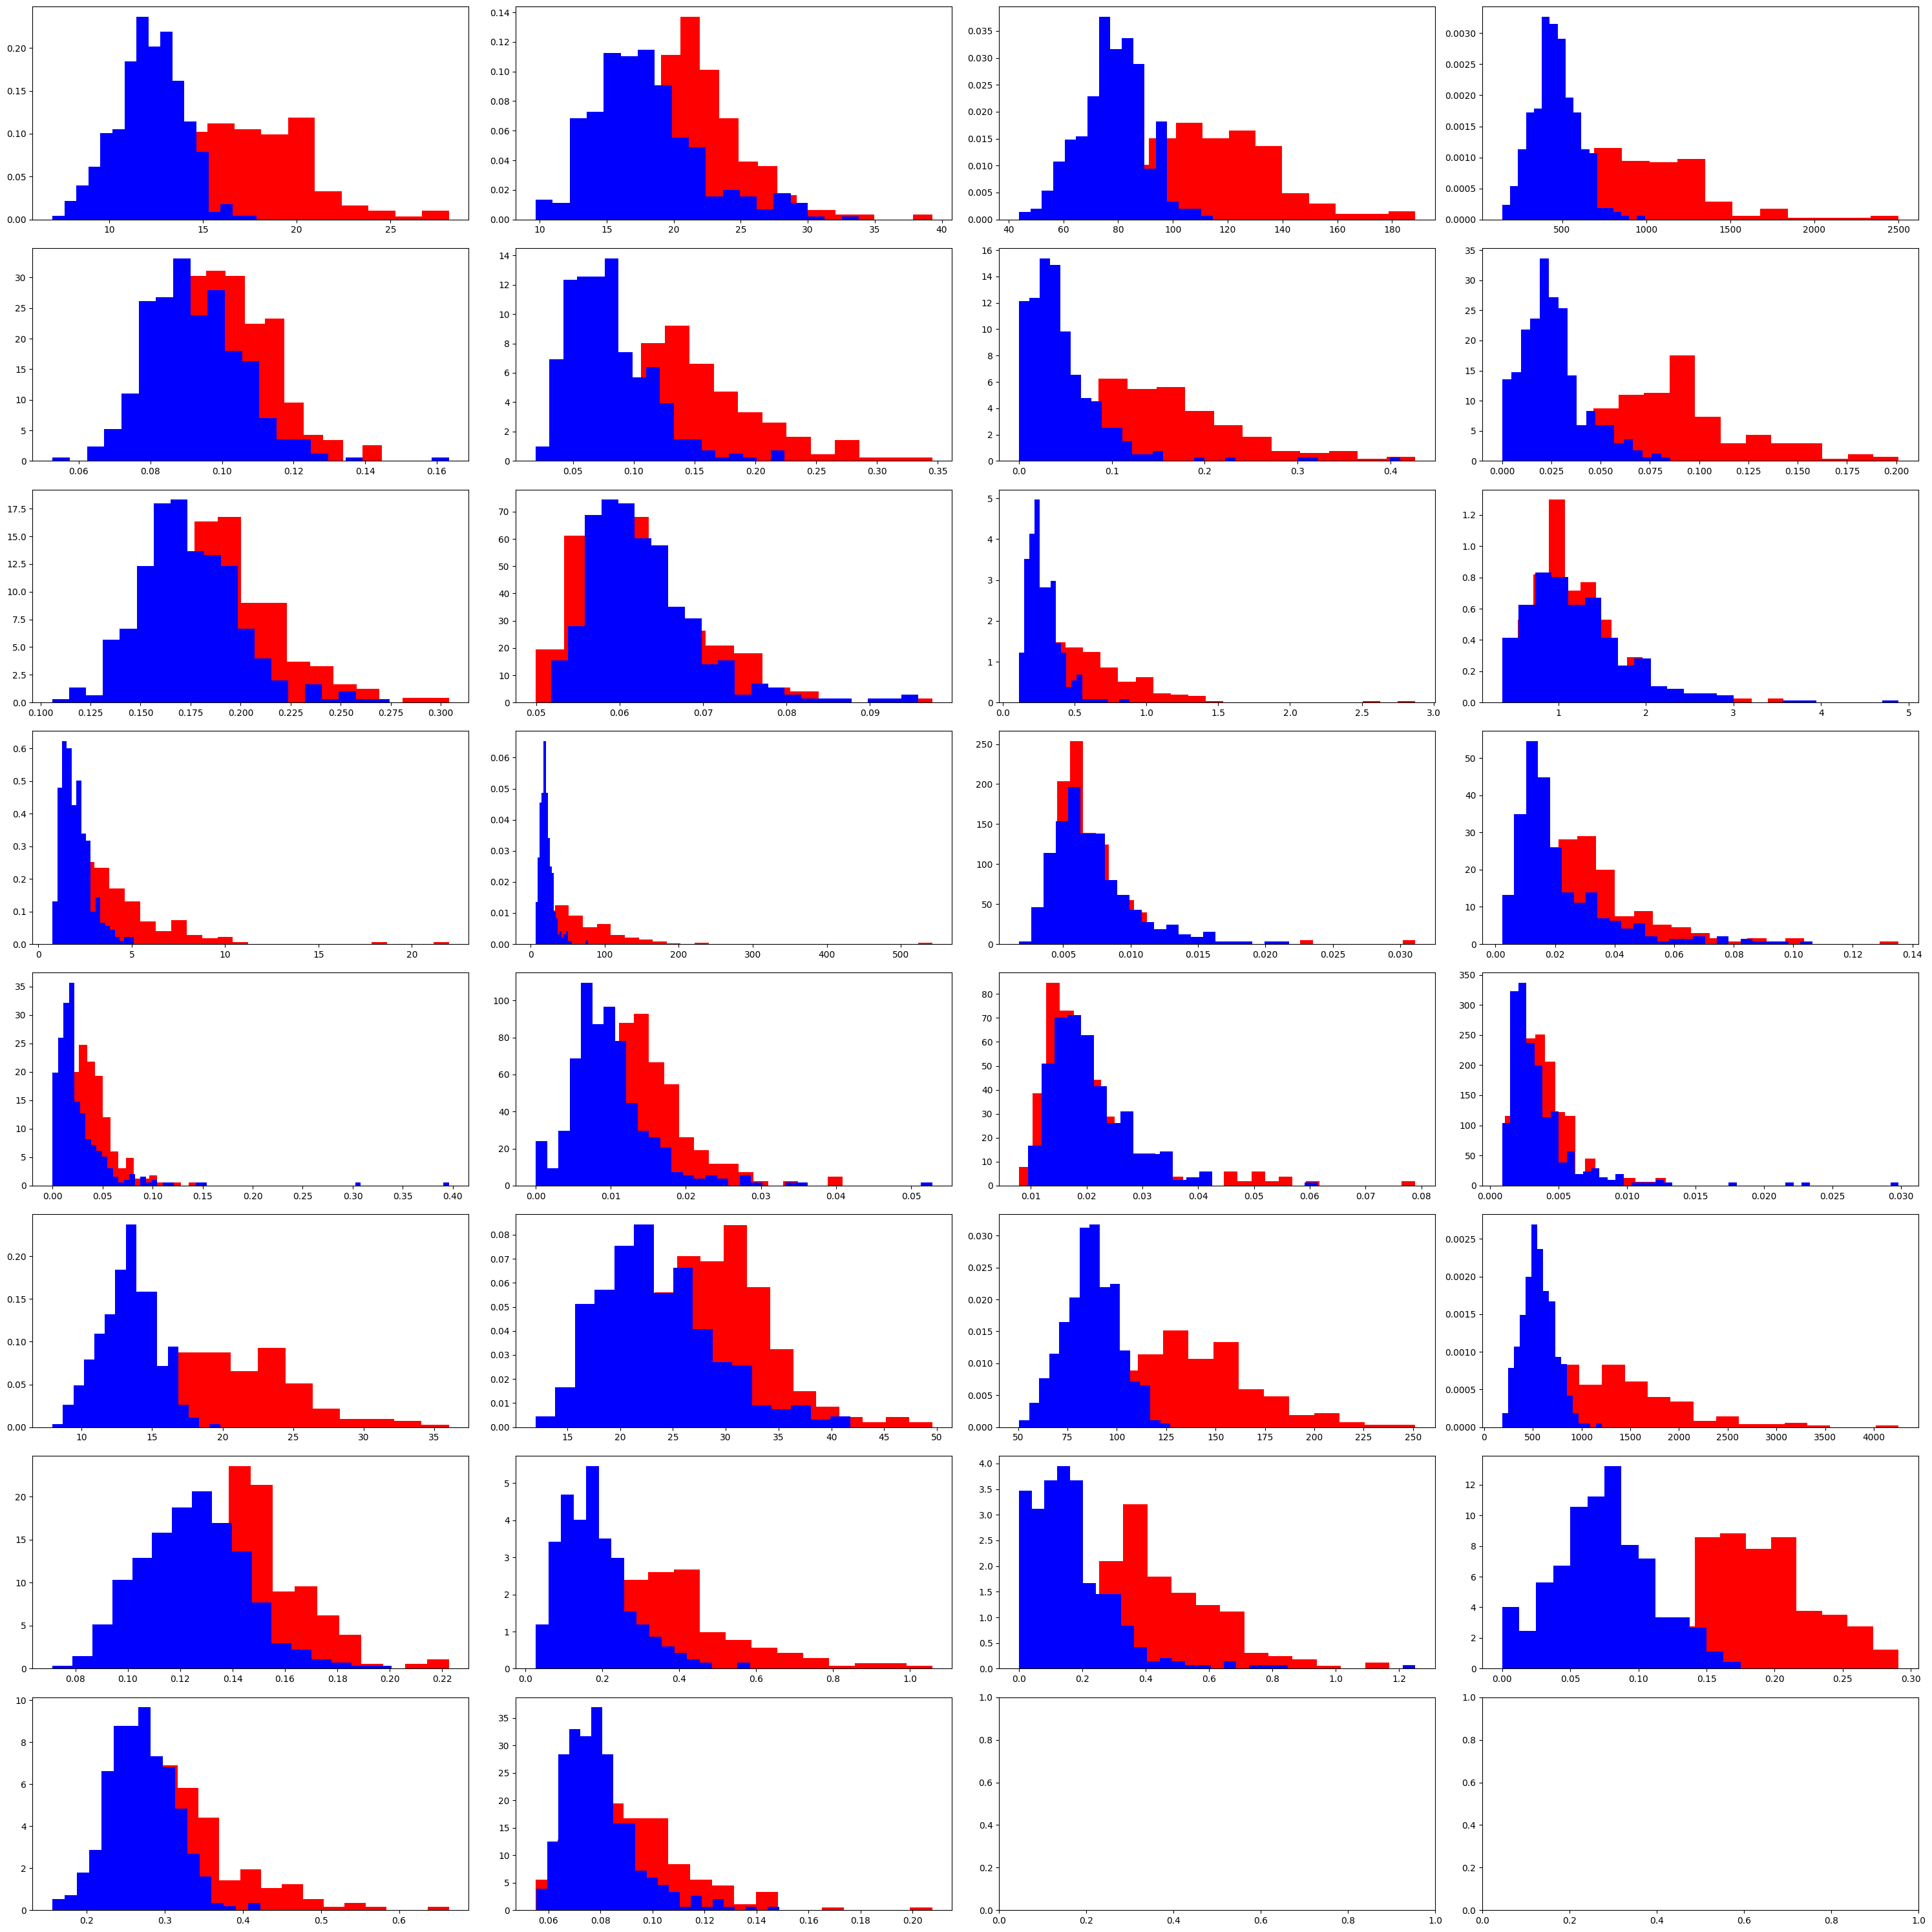

In [ ]:

num_cols = 4  # Number of columns in the grid
num_rows = 8 # Number of rows in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

axes = axes.flatten()
c=0 
for c1 in M_df_col.columns:
    try:
        axes[c].hist(M_df_col[c1],bins="auto",color ="red",density = True)
        axes[c].hist(B_df_col[c1],bins="auto",color ="blue",density = True)
        c+=1
    except: IndexError
# blue will be the beneign because it is not as harmfull and red will be the malignant cause you know it is deadly
plt.tight_layout()
plt.show()

In [ ]:
X = df.drop(columns=["id","diagnosis"])
y = df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)